# Problem 1



Plots of two musics in time and frequency domain

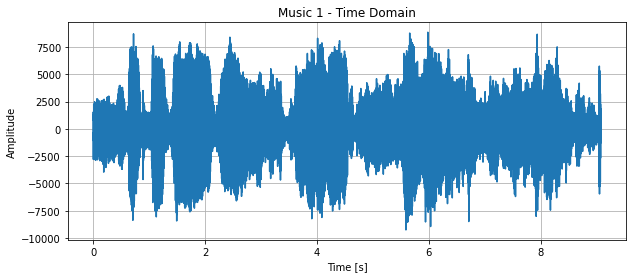

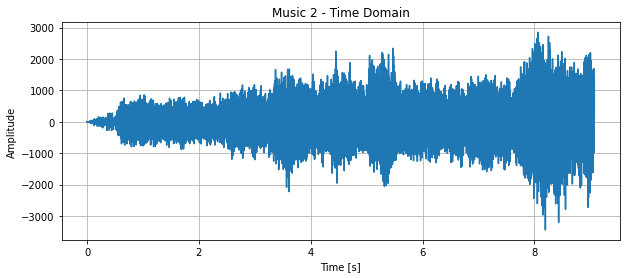

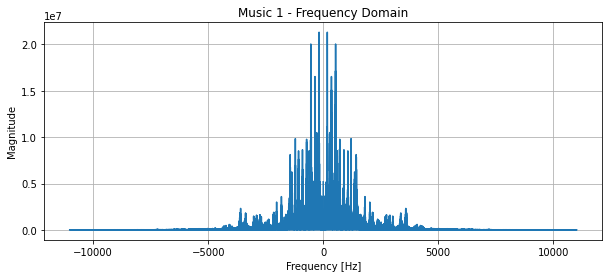

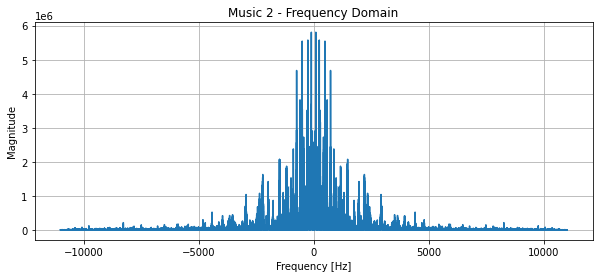

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftshift

fs1, music1 = wavfile.read('music1.wav')
fs2, music2 = wavfile.read('music2.wav')

assert fs1 == fs2, "Sampling rates of the two audio files do not match."

def plot_time_signal(signal, fs, title):
    t = np.arange(len(signal)) / fs
    plt.figure(figsize=(10, 4))
    plt.plot(t, np.real(signal))
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_frequency_spectrum(signal, fs, title):
    N = len(signal)
    freq = np.fft.fftfreq(N, 1/fs)
    spectrum = np.abs(fft(signal))
    
    plt.figure(figsize=(10, 4))
    plt.plot(freq, spectrum)
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

plot_time_signal(music1, fs1, 'Music 1 - Time Domain')
plot_time_signal(music2, fs2, 'Music 2 - Time Domain')

plot_frequency_spectrum(music1, fs1, 'Music 1 - Frequency Domain')
plot_frequency_spectrum(music2, fs2, 'Music 2 - Frequency Domain')



#### Shifting Music1 in Frequency 


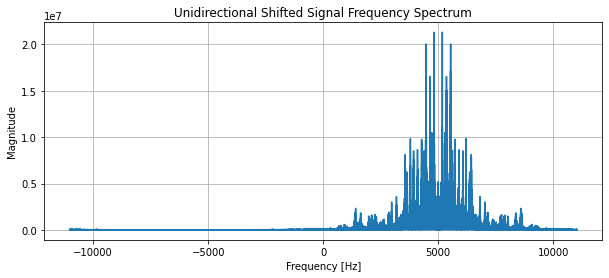

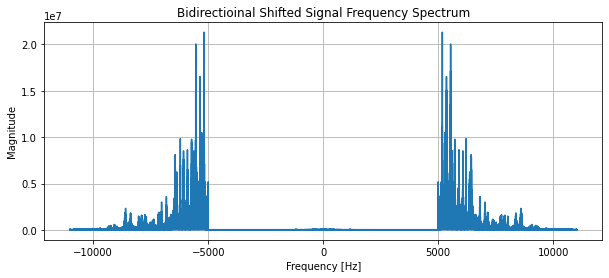

In [7]:
def frequency_shift_uni(signal, fs, shift):
    N = len(signal)
    freq = np.fft.fftfreq(N, 1/fs)
    spectrum = fft(signal)
    shifted_spectrum = np.roll(spectrum, int(shift * N / fs))
    shifted_signal = ifft(shifted_spectrum)
    return shifted_signal
def frequency_shift_bi(signal, fs, shift):
    N = len(signal)
    freq = np.fft.fftfreq(N, 1/fs)
    spectrum = fft(signal)
    spectrum = spectrum[:len(spectrum) // 2]
    shifted_spec = np.roll(spectrum, int( shift* N//2 / (fs/2)))
    shifted_spec = np.concatenate((shifted_spec, np.flip(shifted_spec)))
    shifted_signal = ifft(shifted_spec)
    return shifted_signal


uni_shifted_signal = frequency_shift_uni(music1, fs1, 5000)
bi_shifted_signal = frequency_shift_bi(music1, fs1, 5000)
wavfile.write('uni_shifted_music1.wav', fs1, np.real(uni_shifted_signal).astype(music1.dtype))
wavfile.write('bi_shifted_music1.wav', fs1, np.real(bi_shifted_signal).astype(music1.dtype))

plot_frequency_spectrum(uni_shifted_signal, fs1, 'Unidirectional Shifted Signal Frequency Spectrum')
plot_frequency_spectrum(bi_shifted_signal, fs1, 'Bidirectioinal Shifted Signal Frequency Spectrum')




Combining music2 with shifted music1 and plot in time and frequency domain:


Music2 is ditinguishable as its frequency has not been shifted. In contrast, music1 is a noise in high frequency.

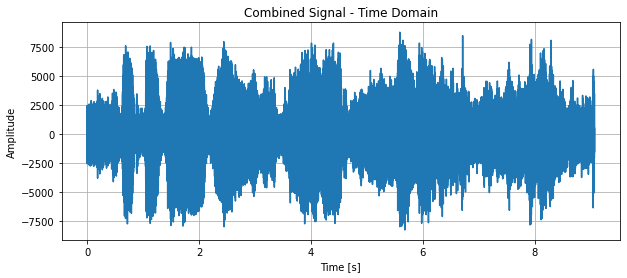

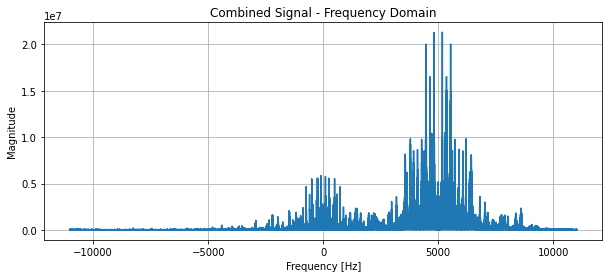

In [9]:
spectrum1 = fft(uni_shifted_signal)
spectrum2 = fft(music2)
combined_spectrum = spectrum1 + spectrum2
combined_signal = ifft(combined_spectrum)

plot_time_signal(combined_signal, fs1, 'Combined Signal - Time Domain')
plot_frequency_spectrum(combined_signal, fs1, 'Combined Signal - Frequency Domain')
wavfile.write('combined.wav', fs1, np.real(combined_signal).astype(music1.dtype))


Now the position of two musics has been swapped.

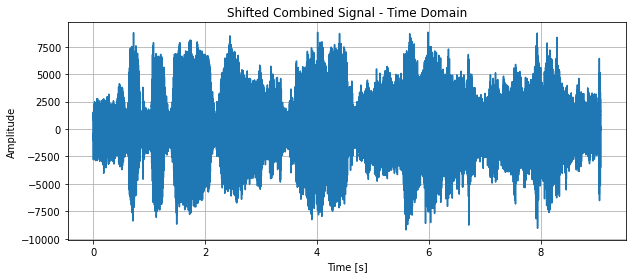

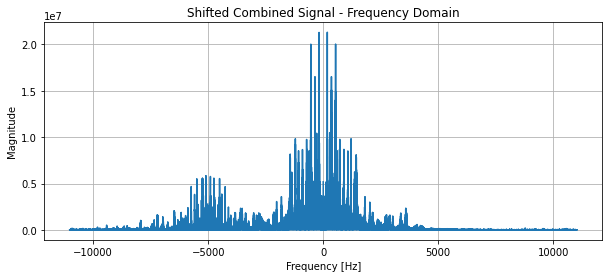

In [10]:
shifted_combined = frequency_shift_uni(combined_signal, fs1, -5000)
plot_time_signal(shifted_combined, fs1, 'Shifted Combined Signal - Time Domain')
plot_frequency_spectrum(shifted_combined, fs1, 'Shifted Combined Signal - Frequency Domain')
wavfile.write('shifted_combined.wav', fs1, np.real(shifted_combined).astype(music1.dtype))


# Problem 2

###  IDFT

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j  \frac{2\pi}{N}kn}
\end{equation}

## Fast Fourier Transform and Inverse

In [15]:

import numpy as np
#2
def fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    exponent = -2j * np.pi * k * n / N
    X = np.dot(np.exp(exponent), x)
    return X



In [16]:
#3
def ifft(X):
    X = np.asarray(X, dtype=complex)
    N = X.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    exponent = 2j * np.pi * k * n / N
    x = np.dot(np.exp(exponent), X) / N
    return x


##   Construct the vector 𝑥[𝑛] = 𝑥(𝑛𝑇) with 𝑥(𝑡) = cos⁡(𝜋𝑡)

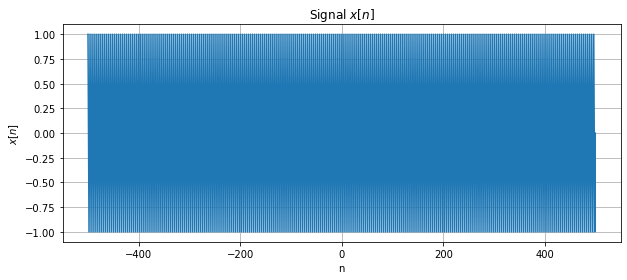

In [17]:
#4 sampling
import matplotlib.pyplot as plt

T = 0.5
N = 1000
n = np.arange(-500, 500)

x_n = np.cos(np.pi * n * T)

plt.figure(figsize=(10, 4))
plt.plot(n, x_n)
plt.title('Signal $x[n]$')
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.grid(True)
plt.show()


##  Fourier transform of 𝑥(𝑡)

\begin{equation}
X(j \omega ) = \pi \delta (\omega - \pi) + \pi \delta (\omega + \pi)
\end{equation}

## Compute DFT of 𝑥[𝑛]

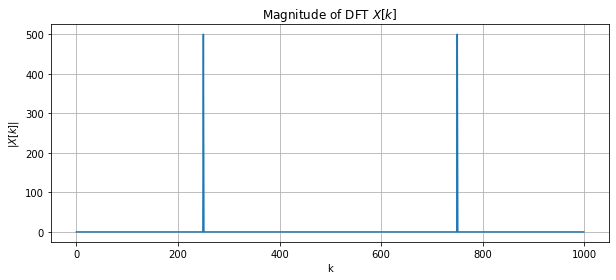

In [18]:
#6
X_k = fft(x_n)

plt.figure(figsize=(10, 4))
plt.plot(np.abs(X_k))
plt.title('Magnitude of DFT $X[k]$')
plt.xlabel('k')
plt.ylabel('$|X[k]|$')
plt.grid(True)
plt.show()

## Apply ifft on 𝑋[𝑘] to reconstruct 𝑥[𝑛]

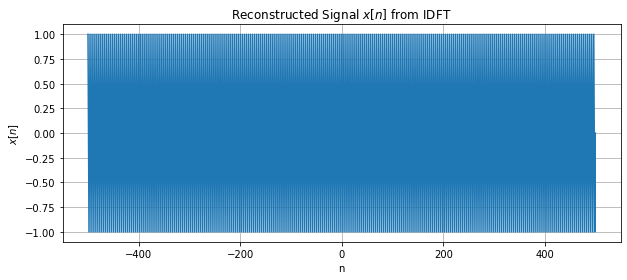

In [19]:
#7
x_n_reconstructed = ifft(X_k)

plt.figure(figsize=(10, 4))
plt.plot(n, x_n_reconstructed.real)  # We take the real part as the imaginary part should be negligible
plt.title('Reconstructed Signal $x[n]$ from IDFT')
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.grid(True)
plt.show()


## Results on different N, T

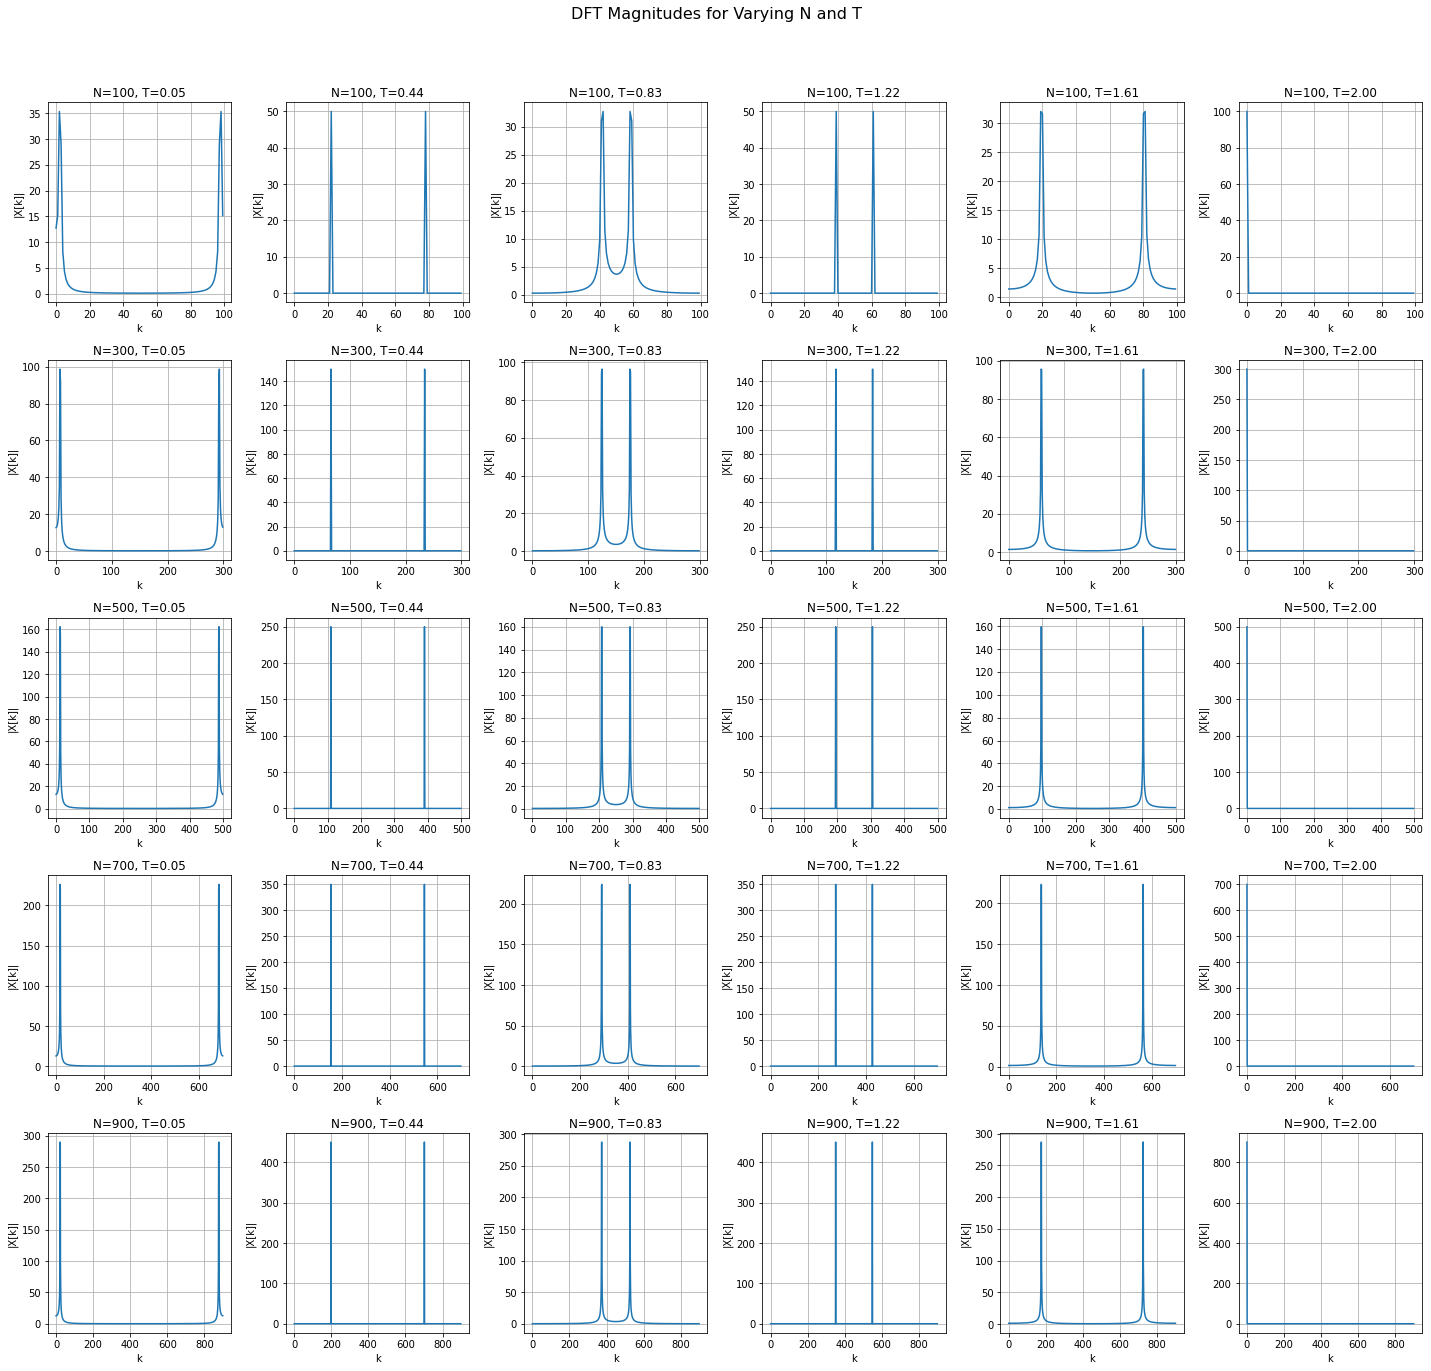

In [16]:
#8
N_values = range(100, 1100, 200)
T_values = np.linspace(0.05, 2, 6)

fig, axes = plt.subplots(len(N_values), len(T_values), figsize=(20, 20))
fig.suptitle('DFT Magnitudes for Varying N and T', fontsize=16)

for i, N in enumerate(N_values):
    for j, T in enumerate(T_values):
        n = np.arange(-N//2, N//2)
        x_n = np.cos(np.pi * n * T)
        X_k = fft(x_n)
        
        ax = axes[i, j]
        ax.plot(np.abs(X_k))
        ax.set_title(f'N={N}, T={T:.2f}')
        ax.set_xlabel('k')
        ax.set_ylabel('|X[k]|')
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Problem 3

We aim to cancel unwanted effect of a system on a sound. This action
is called channel equalization. For such purpose, we have clean1.wav and distorted1.wav as input
and output signals of this system. Clean1 is a signal without any distortion and distorted1 is the
output of the system which has been distorted by the system. distortd2.wav is another signal that
has been the output of this system and we want to recover it at the end by obtaining the frequency response of the system and removing its effect on the signal.

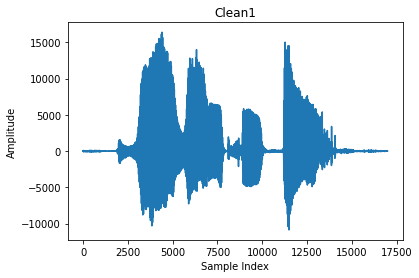

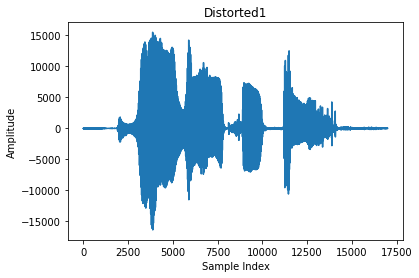

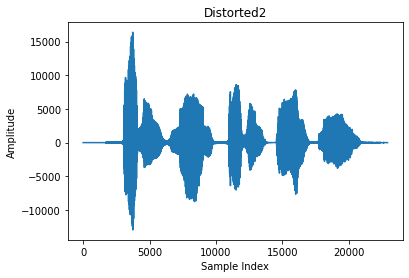

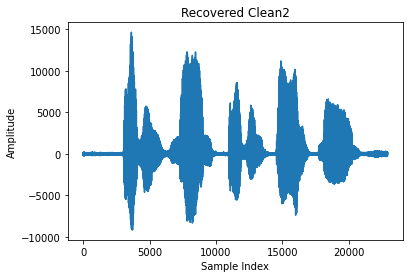

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.io import wavfile
from scipy.signal import resample

fs_clean1, clean1 = wavfile.read('clean1.wav')
_, distorted1 = wavfile.read('distorted1.wav')
_, distorted2 = wavfile.read('distorted2.wav')

def calculate_frequency_response(clean, distorted):
    freq_response = fft(distorted) / fft(clean)
    return freq_response

def recover_signal(freq_response, distorted):
    if len(freq_response) > len(distorted):
        distorted = resample(distorted, len(freq_response))
    elif len(freq_response) < len(distorted):
        freq_response = resample(freq_response, len(distorted))
    
    clean = ifft(fft(distorted) / freq_response)
    return np.real(clean)

def plot_signal(signal, title):
    plt.figure()
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

def save_audio_file(filename, samplerate, signal):
    wavfile.write(filename, samplerate, signal.astype(np.int16))


freq_response = calculate_frequency_response(clean1, distorted1)

clean2_recovered = recover_signal(freq_response, distorted2)

plot_signal(clean1, "Clean1")
plot_signal(distorted1, "Distorted1")
plot_signal(distorted2, "Distorted2")
plot_signal(clean2_recovered, "Recovered Clean2")

save_audio_file('recovered2.wav', fs_clean1, clean2_recovered)



# Problem 4



In this Problem we are going to removing the noise from our signal by applying a filter. To design the filter, we should examine the signal’s spectrum at first. 

Plotting the signal in time domain, it is observed that the second half of the music has only includes noise. Therefore by plotting the spectrum of this segment we can obtain the frequency of the added noise.

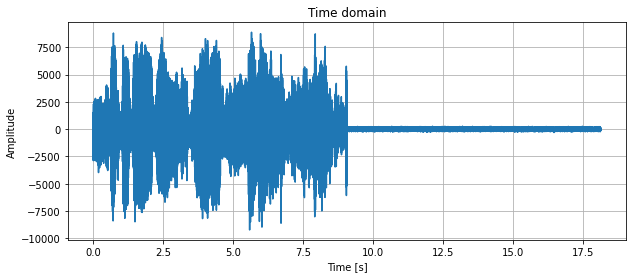

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz

sample_rate, data = wavfile.read('noisy1.wav')


data = data 
plot_time_signal(data,sample_rate, 'Time domain')


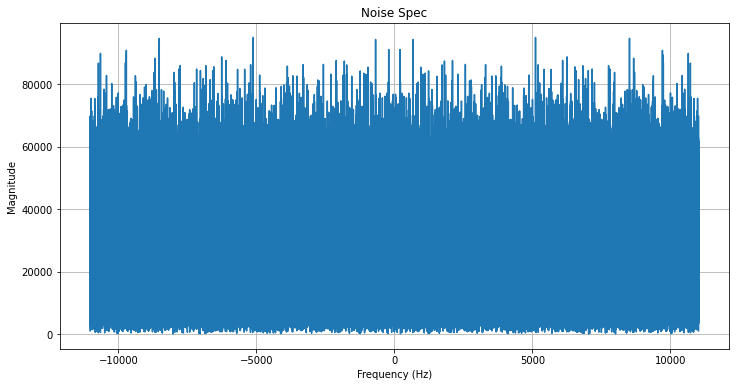

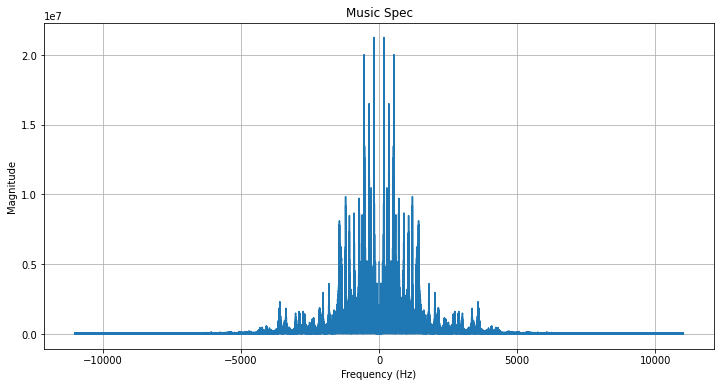

In [11]:
half_point = len(data) // 2

music_data = data[:half_point]
noise_data = data[half_point:]

noise_frequencies = np.fft.fftfreq(len(noise_data), 1/sample_rate)
noise_spectrum = np.fft.fft(noise_data)

music_frequencies = np.fft.fftfreq(len(music_data), 1/sample_rate)
music_spectrum = np.fft.fft(music_data)


def plot_spec(frequencies, spectrum, title):
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

plot_spec(noise_frequencies, noise_spectrum, 'Noise Spec')
plot_spec(music_frequencies, music_spectrum, 'Music Spec')




Noise frequecies are mostly above 4500 so we can denoise the music by applying a simple LPF (low pass filter).

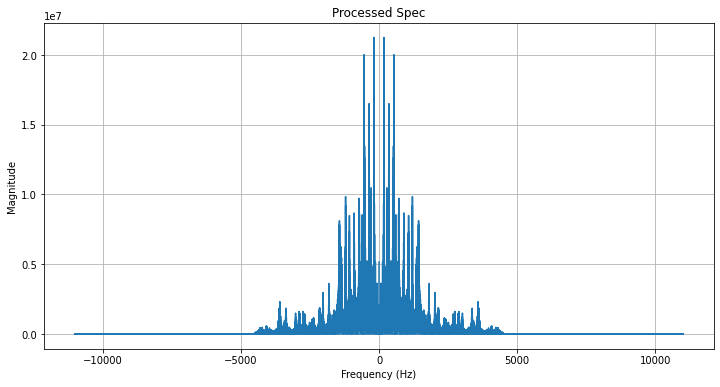

In [13]:
music_spectrum[abs(music_frequencies) >= 4500] = 0

plot_spec(music_frequencies, music_spectrum, "Processed Spec")

clean_music = np.fft.ifft(music_spectrum)

wavfile.write('denoise1.wav', sample_rate, np.real(clean_music).astype(music_data.dtype))